<a href="https://colab.research.google.com/github/louiewang820/car-condition-classification/blob/main/car_condition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
test_size = 40

In [77]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import os 
from PIL import Image
import torch
from keras.preprocessing.image import ImageDataGenerator

# Preparation 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
#change directory to google drive
%cd /content/drive/MyDrive/
#make a directory named data_science_projects/car_condition
!mkdir data_science_projects
#change directory 
%cd data_science_projects

/content/drive/MyDrive
mkdir: cannot create directory ‘data_science_projects’: File exists
/content/drive/MyDrive/data_science_projects


In [9]:
# clone data from github
!git clone https://github.com/louiewang820/car-condition-classification.git


Cloning into 'car-condition-classification'...
remote: Enumerating objects: 1378, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 1378 (delta 2), reused 8 (delta 0), pack-reused 1363
Receiving objects: 100% (1378/1378), 70.74 MiB | 14.94 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (1404/1404), done.


In [16]:
# change directory
%cd car-condition-classification

/content/drive/MyDrive/data_science_projects/car-condition-classification


# A closer look at our data

In [17]:
label = pd.read_csv("data/labels.csv") 
label.head()

,Image_path,Condition
0,img_4513976.jpg,0
1,img_7764995.jpg,1
2,img_451308.jpg,0
3,img_7768372.jpg,1
4,img_7765274.jpg,1


In [22]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_path  1399 non-null   object
 1   Condition   1399 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.0+ KB


In [26]:
# calculate percentage of damaged cars
round(sum(label['Condition'])/label.shape[0],2)

0.93

* To address the issue of imbalanced data, we will create a balanced test set by selecting 20 images each of damaged and good condition. Additionally, we will utilize image augmentation techniques on our training image data to further balance the training data set.

# split data 

In [56]:
def split(data,test_size,if_train, seed= 123):
  """
    The split function is used to divide a dataset into a training and testing set. 
    To ensure that the damaged conditions are represented equally in test sets, 
    the function takes into account the imbalanced nature of the data. 
    The function takes in four parameters: the path of the original dataset,
    the test size we desire, a flag indicating whether the output is for training or testing, 
    and a seed for reproducibility. It returns the appropriate training or testing dataset.
  """ 
  class_damaged_size_ratio = (test_size/2)/ sum(data['Condition'])
  class_undamged_test_size_ratio = (test_size/2)/ sum(data['Condition'] == 0)
  damaged = data[data.Condition == 1]
  undamaged = data[data.Condition == 0]
  train_damaged, test_damaged = train_test_split(damaged, test_size=class_damaged_size_ratio , random_state=seed) # for Reproducibility
  train_undamaged, test_undamaged = train_test_split(undamaged, test_size=class_undamged_test_size_ratio , random_state=seed) # for Reproducibility
  if if_train:
    return pd.concat([train_damaged,train_undamaged])
  else:
    return pd.concat([test_damaged,test_undamaged])

In [57]:
train = split(label,test_size,if_train = True)
test = split(label,test_size,if_train = False)
round(sum(test['Condition'])/test.shape[0],2)

0.5

* Now we have a balanced test data. 

# Image augmentation for traning data

In [61]:
class Augmentation():
    def __init__(self, label, image_folder):
        self.label = label 
        self.image_folder = image_folder
    def concat(self, index):  
        img_path = os.path.join(self.image_folder, self.label.iloc[index, 0]) # get the individual img path 
        image = Image.open(img_path) # return the image by call the Image.open(), the image is in RGB form
        y_label = torch.tensor(int(self.label.iloc[index, 1])) # change the label to tensor form
        return (image, y_label) # data set contains images and its label 
    def replicate(self):
        
  



In [72]:
car = Augmentation(train,'data/Images')

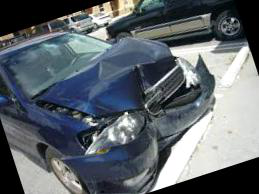

In [75]:
Image.open('data/Images/img_7765866.jpg')


In [71]:
%ls data/

Images/  labels.csv
